<a href="https://colab.research.google.com/github/rodrygofesantos/oficina_forped/blob/main/Mapa_de_calor_georefenciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

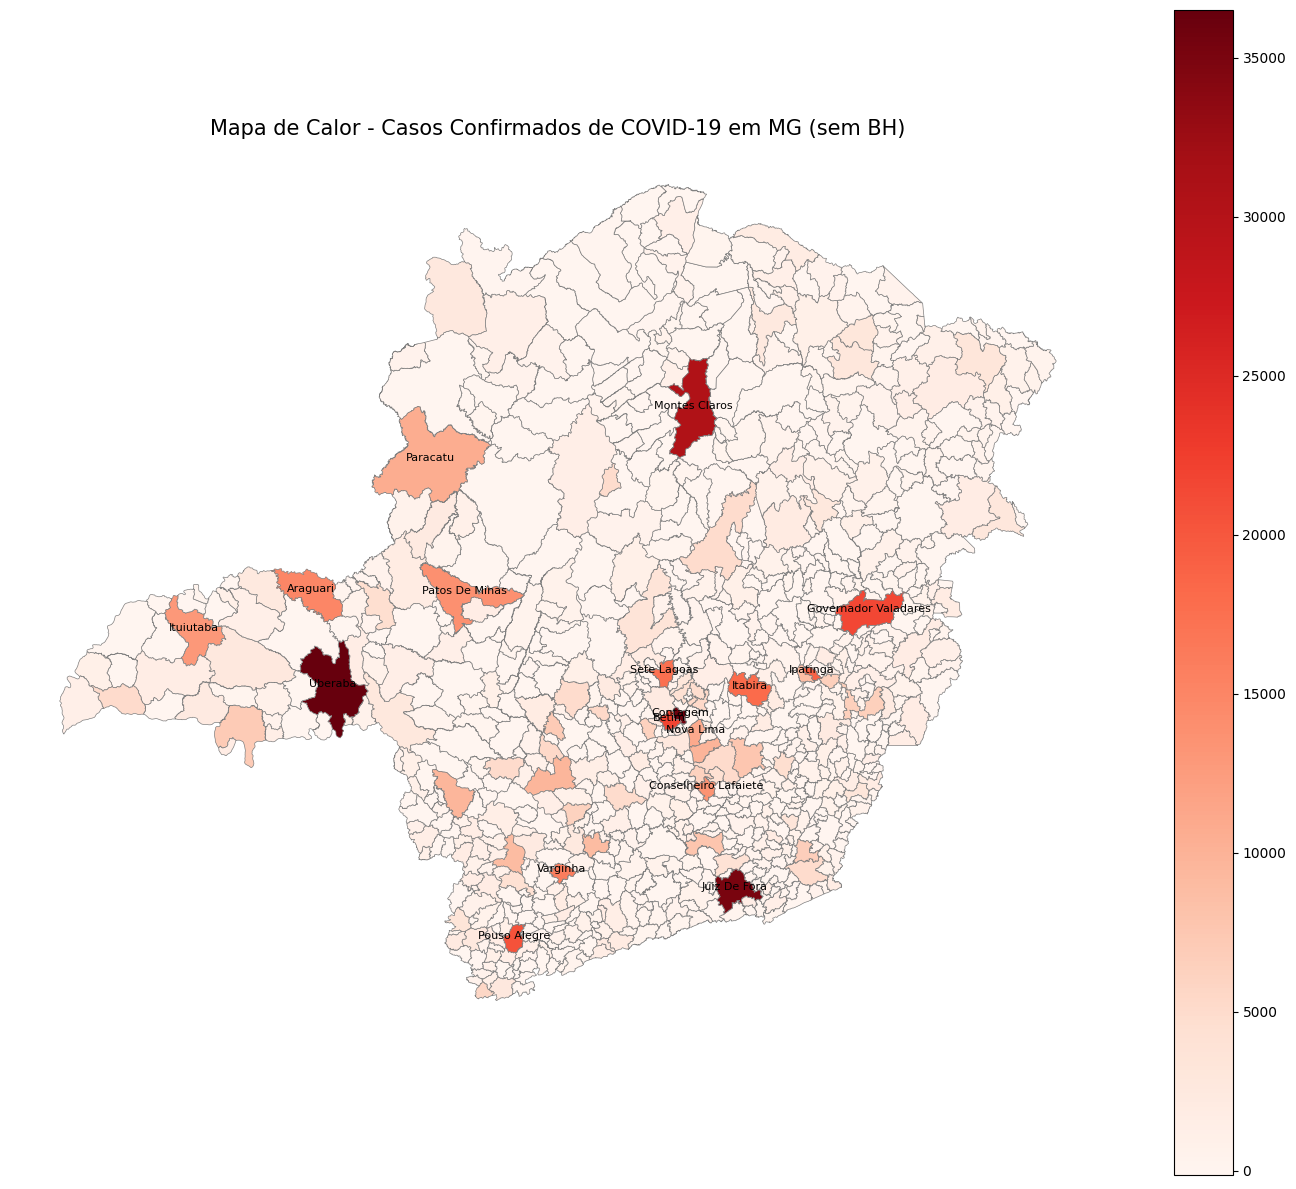

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile

# Caminhos dos arquivos
shp_path = "/content/shape/MG_Municipios_2024.shp"
csv_path = "/content/Painel_2021.csv"

# Leitura dos dados
gdf = gpd.read_file(shp_path)
df = pd.read_csv(csv_path, encoding='latin1')

# Padronizar colunas
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
gdf.columns = [c.strip().lower().replace(" ", "_") for c in gdf.columns]

# Definir colunas
col_municipio_df = 'municipio_residencia'
col_confirmados = 'confirmados'
col_nome_gdf = 'nm_mun'

# Agregar e preparar dados
df_agg = df.groupby(col_municipio_df)[col_confirmados].sum().reset_index()
df_agg.columns = ['municipio', 'casos']
df_agg['municipio'] = df_agg['municipio'].str.upper()

# Excluir Belo Horizonte
df_agg = df_agg[df_agg['municipio'] != 'BELO HORIZONTE']

# Padronizar nomes e mesclar
gdf[col_nome_gdf] = gdf[col_nome_gdf].str.upper()
gdf_merged = gdf.merge(df_agg, left_on=col_nome_gdf, right_on='municipio', how='left')
gdf_merged['casos'] = gdf_merged['casos'].fillna(0)

# Plot com nomes dos municípios de maior incidência
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
gdf_merged.plot(column='casos', cmap='Reds', linewidth=0.5, edgecolor='gray', legend=True, ax=ax)

# Adicionar nomes apenas aos municípios com mais de 10.000 casos
for idx, row in gdf_merged.iterrows():
    if row['casos'] > 10000:
        plt.annotate(
            text=row['municipio'].title(),
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
            horizontalalignment='center',
            fontsize=8,
            color='black'
        )

# Título e estilo
plt.title("Mapa de Calor - Casos Confirmados de COVID-19 em MG (sem BH)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()
